In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df_train = pd.read_csv("Malignant_train.csv")
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
df_test=pd.read_csv("Malignant_test.csv")
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
df_train['malignant'].unique()

array([0, 1], dtype=int64)

In [5]:
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [6]:
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [7]:
df_train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


<AxesSubplot:>

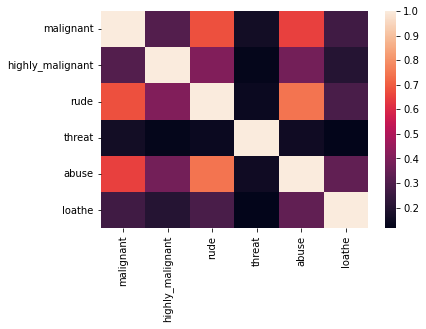

In [8]:
sns.heatmap(df_train.corr())

In [9]:
df_train.skew()

C:\Users\Vikas\AppData\Local\Temp\ipykernel_3380\1035533876.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train.skew()


malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

In [10]:
import warnings
warnings.filterwarnings('ignore')

malignant
0    144277
1     15294
Name: malignant, dtype: int64


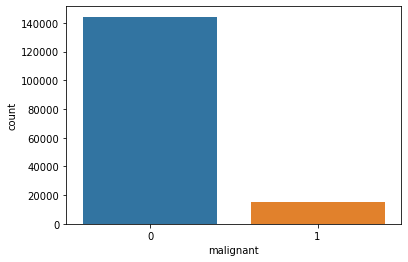

highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64


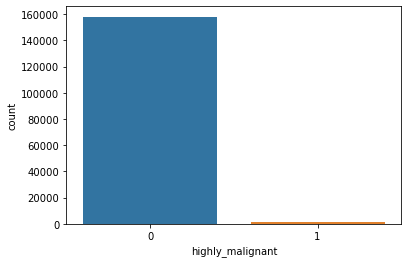

rude
0    151122
1      8449
Name: rude, dtype: int64


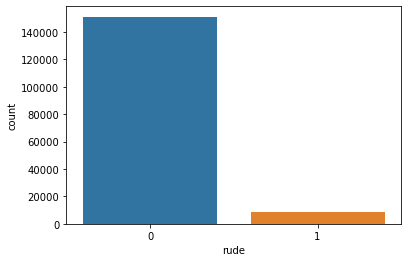

threat
0    159093
1       478
Name: threat, dtype: int64


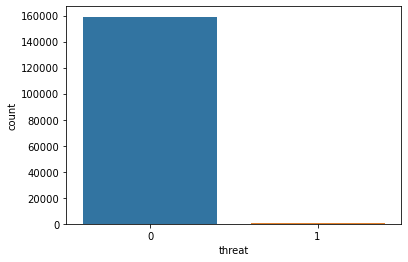

abuse
0    151694
1      7877
Name: abuse, dtype: int64


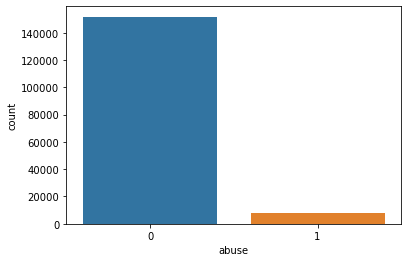

loathe
0    158166
1      1405
Name: loathe, dtype: int64


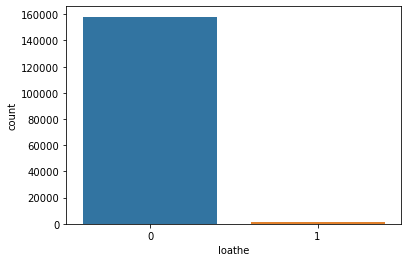

In [11]:
col=['malignant','highly_malignant','rude','threat','abuse','loathe']
for i in col:
    print(i)
    print(df_train[i].value_counts())
    sns.countplot(df_train[i])
    plt.show()

In [12]:
le = LabelEncoder()

In [13]:
df_train['id']= le.fit_transform(df_train['id'])
df_train['comment_text']=le.fit_transform(df_train['comment_text'])
df_test['id']=le.fit_transform(df_test['id'])
df_test['comment_text']=le.fit_transform(df_test['comment_text'])

In [14]:
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,72698,0,0,0,0,0,0
1,1,68359,0,0,0,0,0,0
2,2,79594,0,0,0,0,0,0
3,4,35519,0,0,0,0,0,0
4,5,146426,0,0,0,0,0,0


In [16]:
x=df_train.drop('malignant',axis=1)
y=df_train['malignant']
x_train,y_train,x_test,y_test = train_test_split(x,y,test_size=0.25)
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.fit(x_test,y_test)

ValueError: y should be a 1d array, got an array of shape (39893, 7) instead.

In [18]:
x.shape
x

,id,comment_text,highly_malignant,rude,threat,abuse,loathe
0,0,72698,0,0,0,0,0
1,1,68359,0,0,0,0,0
2,2,79594,0,0,0,0,0
3,4,35519,0,0,0,0,0
4,5,146426,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,159505,44289,0,0,0,0,0
159567,159510,145720,0,0,0,0,0
159568,159524,122203,0,0,0,0,0
159569,159535,60037,0,0,0,0,0


In [17]:
y.shape
y

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: malignant, Length: 159571, dtype: int64